In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class KALMAN_FILTER:
    def __init__(self, P, A, Q, H, R):
        '''
        P: Predicted estimate covariance
        A: The state-transition model
        Q: The covariance of the process noise
        H: The observation model
        R: The covariance of the observation noise
        K: Kalman gain
        '''        
        self.P = P
        self.A = A        
        self.Q = Q
        self.H = H
        self.R = R
        self.K = None

    def step(self, x, z):
        # Predict
        x = np.dot(self.A, x)
        self.P = np.dot(self.A, np.dot(self.P, self.A.T)) + self.Q
        
        # Kalman Gain
        self.K = np.dot(np.dot(self.P, self.H.T), np.linalg.pinv(np.dot(self.H, np.dot(self.P, self.H.T)) + self.R))
        
        # Estimate
        x = x + np.dot(self.K, (z-np.dot(self.H, x)))
        
        # Update P
        self.P = self.P - np.dot(self.K, np.dot(self.H, self.P))
        
        return x

In [3]:
# Set Random Seed
np.random.seed(42)

# Generate Data (MEAN=16, STD=4)
mean = 16
std = 4
num = 100
data = np.random.normal(mean, std, num)

# Set Parameters
x = np.matrix([14])
P = np.matrix([4])
A = np.matrix([1])
Q = np.matrix([0])
R = np.matrix([4])
H = np.matrix([1])

# Process
kalman = KALMAN_FILTER(P, A, Q, H, R)
ests = []
Ps = []
Ks = []
for z in data:
    z = np.matrix([z])
    x = kalman.step(x, z)
    ests.append(x.item())
    Ps.append(kalman.P.item())
    Ks.append(kalman.K.item())

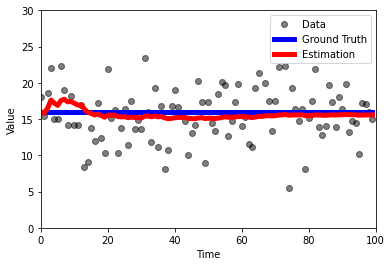

In [4]:
plt.plot(data, 'o', color='k', alpha=0.5, label='Data')
plt.plot([mean]*num, lw=5, color='b', label='Ground Truth')
plt.plot(ests, lw=5, color='r', label='Estimation')
plt.legend()
plt.xlim(0, num)
plt.ylim(0, 30)
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

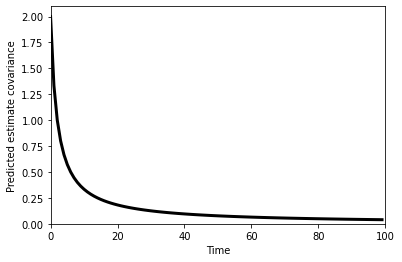

In [5]:
plt.plot(Ps, lw=3, color='k')
plt.xlim(0, num)
plt.ylim(bottom=0)
plt.xlabel('Time')
plt.ylabel('Predicted estimate covariance')
plt.show()

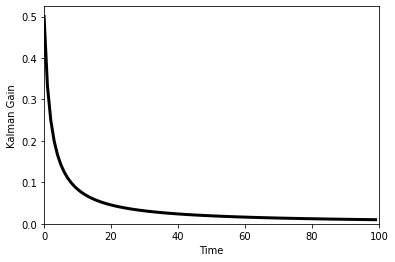

In [6]:
plt.plot(Ks, lw=3, color='k')
plt.xlim(0, num)
plt.ylim(bottom=0)
plt.xlabel('Time')
plt.ylabel('Kalman Gain')
plt.show()